In [158]:
import glob,os
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

################## USER INPUTS ############################
images_directory = "/Users/domchom/Documents/GitHub/Dom_python_scripts/image_segment"
image_of_interest = 'waves-crop.tif'
box_size = 8 
frames_to_roll = 5 #for the rolling workflow

################### WORKFLOW ############################

os.chdir(images_directory) # the pathname that contains the folders of interest

ori_mov = Image.open(image_of_interest) #image import

num_of_boxes_x = ori_mov.size[0] / box_size
num_of_boxes_y = ori_mov.size[1] / box_size

num_of_total_boxes = int(num_of_boxes_x * num_of_boxes_y)

frame_avg_px_val = {} #average pixel value per frame

n = 0

for one_segment in range(num_of_total_boxes):
    avg_px_val_per_frame_per_tile = []
    for i, page in enumerate(ImageSequence.Iterator(ori_mov)): #iterate over each frame
        one_frame = np.asarray(page)

        new_tiles = [one_frame[x:x+box_size,y:y+box_size] for x in range(0,one_frame.shape[0],box_size) for y in range(0,one_frame.shape[1],box_size)] #making each tile
        
        tile_avg_pix_val = []

        for tile in new_tiles[n]:
            first_channel_values = [] #list of pixel values for each tiles
            for one_pixel in tile:
                first_channel_values.append(one_pixel)
        mean_pix_val_of_tile = sum(first_channel_values) / len(first_channel_values) #calc the mean
        avg_px_val_per_frame_per_tile.append(mean_pix_val_of_tile)
    frame_avg_px_val[n] = avg_px_val_per_frame_per_tile[:-1]
    n += 1

for key, value in frame_avg_px_val.items():
    plt.plot(frame_avg_px_val[key])

KeyboardInterrupt: 

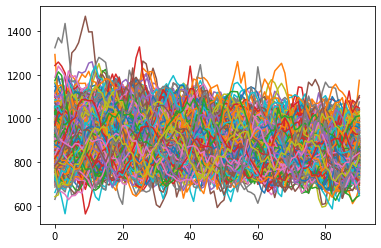

In [145]:
###################### ROLLING WORKFLOW ############################

rolling = {} #new dictionary to contain the rolling normalized intensity profiles for each movie
i = 0
for segment_number in frame_avg_px_val: #for each intensity value in the tuple "value" of the dictinary
    rolling_int_profile = []
    w = 0
    for avg_int in frame_avg_px_val[segment_number]:
        if w < len(frame_avg_px_val[segment_number]) - frames_to_roll: # to keep the system in the correct range
            rolled_int = sum(frame_avg_px_val[segment_number][w:(w+frames_to_roll)]) / frames_to_roll
            rolling_int_profile.append(rolled_int)
            w += 1
        else:
            break
    rolling[i] = rolling_int_profile
    i += 1

for key, value in rolling.items():
    plt.plot(rolling[key])

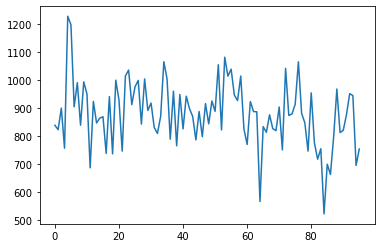

In [157]:
###################### FIRST FEW SEGMENTED REGIONS ###############
import itertools

short_dict = dict(itertools.islice(frame_avg_px_val.items(), 4, 5))

for key, value in short_dict.items():
    plt.plot(short_dict[key])

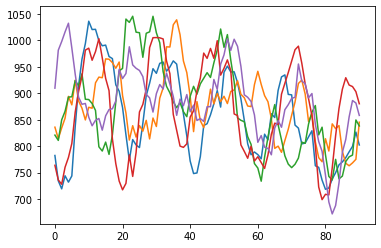

In [153]:
rolling = {} #new dictionary to contain the rolling normalized intensity profiles for each movie
i = 0
frames_to_roll = 5
for segment_number in short_dict: #for each intensity value in the tuple "value" of the dictinary
    rolling_int_profile = []
    w = 0
    for avg_int in short_dict[segment_number]:
        if w < len(short_dict[segment_number]) - frames_to_roll: # to keep the system in the correct range
            rolled_int = sum(short_dict[segment_number][w:(w+frames_to_roll)]) / frames_to_roll
            rolling_int_profile.append(rolled_int)
            w += 1
        else:
            break
    rolling[i] = rolling_int_profile
    i += 1

for key, value in rolling.items():
    plt.plot(rolling[key])

In [134]:
with open('!raw_values.csv', 'w') as f:
    for key in frame_avg_px_val.keys():
        f.write("%s,%s\n"%(key,frame_avg_px_val[key]))

with open('!rolling_values.csv', 'w') as f:
    for key in rolling.keys():
        f.write("%s,%s\n"%(key,rolling[key]))

In [150]:
print(ori_mov.size)
print(box_size)

(202, 190)
8
